### Importing Libraries
This cell imports essential libraries for data manipulation, analysis, handling missing data, visualization, and statistical analysis.


In [125]:
# Libraries for data manipulation and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and arrays

# Libraries for handling missing data
from sklearn.impute import SimpleImputer  # Simple imputation
import missingno as msno  # Visualizing missing data

# Visualization libraries
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Statistical analysis (if needed)
import scipy.stats as stats  # Statistical functions

# Libraries for cumulative graphs
import plotly.express as px
import plotly.graph_objects as go
import nbformat


import random


### Display Initial DataFrame
This cell displays the initial DataFrame to understand the structure and the data it contains.


In [126]:
#Loading thecsv file
data = pd.read_csv("crop_prices.csv")

#Displaying the first 20 records the csv file with header funvtion
data.head(21)

,year,state_name,county_name,country_code,commodity_desc,class_desc,unit_desc,freq_desc,group_desc,source_desc,sector_desc,commodity_desc.1,statisticcat_desc,begin_code,Value
0,2021,WEST VIRGINIA,NaN,9000,CORN,ALL CLASSES,PCT EMERGED,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,"PROGRESS, 5 YEAR AVG",18,7
1,2023,NORTH DAKOTA,NaN,9000,CORN,ALL CLASSES,BU,ANNUAL,FIELD CROPS,SURVEY,CROPS,CORN,PRODUCTION,0,"516,120,000"
2,2023,NORTH DAKOTA,NaN,9000,CORN,ALL CLASSES,PCT DOUGH,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,"PROGRESS, PREVIOUS YEAR",28,0
3,2021,US TOTAL,NaN,9000,CORN,ALL CLASSES,PCT FAIR,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,"CONDITION, PREVIOUS YEAR",41,25
4,2021,NEW HAMPSHIRE,NaN,9000,CORN,ALL CLASSES,PCT POOR,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,"CONDITION, PREVIOUS YEAR",35,20
5,2023,NEBRASKA,NaN,9000,CORN,ALL CLASSES,PCT FAIR,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,"CONDITION, 5 YEAR AVG",35,21
6,2023,PENNSYLVANIA,NaN,9000,CORN,ALL CLASSES,PCT GOOD,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,CONDITION,33,63
7,2021,ARKANSAS,NaN,9000,CORN,ALL CLASSES,PCT GOOD,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,"CONDITION, 5 YEAR AVG",30,47
8,2021,INDIANA,WABASH,9000,CORN,ALL CLASSES,BU / ACRE,ANNUAL,FIELD CROPS,SURVEY,CROPS,CORN,YIELD,0,189
9,2022,MINNESOTA,NaN,9000,CORN,ALL CLASSES,PCT POOR,WEEKLY,FIELD CROPS,SURVEY,CROPS,CORN,CONDITION,22,3


In [127]:
# Print the size of the DataFrame
print("DataFrame size (rows, columns):", data.shape)

print("================================================")

#Display data information to see data type and nulls
print(data.info())





DataFrame size (rows, columns): (200, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               200 non-null    int64 
 1   state_name         200 non-null    object
 2   county_name        47 non-null     object
 3   country_code       200 non-null    int64 
 4   commodity_desc     200 non-null    object
 5   class_desc         200 non-null    object
 6   unit_desc          200 non-null    object
 7   freq_desc          200 non-null    object
 8   group_desc         200 non-null    object
 9   source_desc        200 non-null    object
 10  sector_desc        200 non-null    object
 11  commodity_desc.1   200 non-null    object
 12  statisticcat_desc  200 non-null    object
 13  begin_code         200 non-null    int64 
 14  Value              200 non-null    object
dtypes: int64(3), object(12)
memory usage: 23.6+ KB
No

### Calculating Nulls in Each Column
This cell calculates and prints the number of missing values in each column before any handling of null values.
Only county_name has missing values


In [128]:
#Calculating nulls in each columns
print("Number of missing values before handling nulls:")
print(data.isnull().sum())

Number of missing values before handling nulls:
year                   0
state_name             0
county_name          153
country_code           0
commodity_desc         0
class_desc             0
unit_desc              0
freq_desc              0
group_desc             0
source_desc            0
sector_desc            0
commodity_desc.1       0
statisticcat_desc      0
begin_code             0
Value                  0
dtype: int64


### Unique Values in 'county_name' Column to see if we can replace it with most unique value
This cell counts the number of unique values in the 'county_name' column, displays the counts of each unique value, and identifies the most frequent value.
However the most frequent was MARION that appears two times which doesnot assume the other values should be replaced with that


In [129]:
# Count the number of unique values in the 'county_name' column
num_unique_values = data['county_name'].nunique()

# Count the occurrences of each unique value in the 'county_name' column
unique_counts = data['county_name'].value_counts()

# Extract the most frequent value
most_frequent_value = unique_counts.idxmax()

print("Number of Unique Values:", num_unique_values)
print("\nUnique Values and their Counts:")
print(unique_counts)
print("\nMost Frequent Value:", most_frequent_value)

Number of Unique Values: 44

Unique Values and their Counts:
county_name
MARION            2
SAUK              2
SHELBY            2
CHARLEVOIX        1
WARREN            1
WEBSTER           1
NASH              1
SUSSEX            1
WASHINGTON        1
BARRON            1
YUMA              1
YADKIN            1
TODD              1
WADENA            1
CRAIG             1
LEBANON           1
FREDERICK         1
KIDDER            1
RENSSELAER        1
SIOUX             1
PAMLICO           1
ROLETTE           1
WABASH            1
MARATHON          1
FAYETTE           1
CHESTERFIELD      1
BLACK HAWK        1
WOODSON           1
VAN BUREN         1
MORGAN            1
CASS              1
GREENE            1
YORK              1
FOND DU LAC       1
JACKSON           1
SAN PATRICIO      1
DEUEL             1
MARSHALL          1
BARNES            1
OSBORNE           1
LINN              1
DANE              1
EMMONS            1
OTHER COUNTIES    1
Name: count, dtype: int64

Most Frequent Value:

### Replacing Missing Values in 'county_name' Column
This cell replaces missing values in the 'county_name' column with random non-missing values from the same column since most frequent value cant be used


In [130]:
# Replace None with NaN
data['county_name'] = data['county_name'].replace({None: np.nan})

# Get non-missing values
non_missing_values = data['county_name'].dropna().unique()

# Fill missing values with randomly selected non-missing values
for index, row in data.iterrows():
    if pd.isnull(row['county_name']):
        data.at[index, 'county_name'] = random.choice(non_missing_values)

print("Column name successfully updated")

print("================================================")

#Calculating nulls in each columns after handling null values
print("Number of missing values after handling nulls:")
print(data.isnull().sum())

Coumn name successfully updated
Number of missing values after handling nulls:
year                 0
state_name           0
county_name          0
country_code         0
commodity_desc       0
class_desc           0
unit_desc            0
freq_desc            0
group_desc           0
source_desc          0
sector_desc          0
commodity_desc.1     0
statisticcat_desc    0
begin_code           0
Value                0
dtype: int64


### Checking for Duplicates in DataFrame
This cell checks for duplicate rows in the DataFrame and prints the duplicate rows if any.


In [131]:
# Find duplicate rows based on all columns
duplicates = data.duplicated(keep=False)

# Count all rows that are duplicates
duplicate_count = duplicates.sum()

print(f"Number of duplicate rows: {duplicate_count}")

# If you want to see all duplicate rows together
print("\nAll duplicate rows:")
print(data[duplicates])

Number of duplicate rows: 0

All duplicate rows:
Empty DataFrame
Columns: [year, state_name, county_name, country_code, commodity_desc, class_desc, unit_desc, freq_desc, group_desc, source_desc, sector_desc, commodity_desc.1, statisticcat_desc, begin_code, Value]
Index: []


### Display Unique Values in a Specific Column
This cell displays all unique values in the 'county_name' column.
This is to check for values that are not supposed to be in a particular column which end up chaning thier data type for example in The value column is of type object instead of integer of float


In [132]:
# Get unique values in the 'county_name' column
unique_values = data['Value'].unique()

# Print unique values
print(f"Unique values in 'Value' column: {unique_values}")

Unique values in 'Value' column: ['7' '516,120,000' '0' '25' '20' '21' '63' '47' '189' '3' '94' '1' '13'
 '4' '93' '49' '12' '65' '5' '84' '565,000' '60' '3,500,000' '62'
 '26,562,000' '30' '19' '61' '63.4' '73' '45' '17' '700' '7,026,000' '82'
 '18' '48' '37' '375,000' '46' '5,200' '23' '223,500' '918,000'
 '87,096,000' '15.8' '99' '34' '150' '51,900' '48,000' '53' '3,883,000'
 '84.6' '16,400' '15' '147,500' '                 (D)' '196,600' '97.4'
 '7,053,000' '44' '8' '6' '147,000' '26.5' '10' '71' '144.8' '7,470' '95'
 '405,000' '87' '13,413,000' '1,158,000' '72' '174,000' '45,000' '14' '31'
 '29' '3,690' '1,449,000' '24' '66' '2' '16,214,000' '20,600' '16,500'
 '4.64' '96' '187.6' '11,100' '84,500' '164.3' '281,000' '516,000' '90'
 '114.7' '3,640' '11' '201.8' '-1' '16,100' '13,200' '22' '89' '2,040'
 '1,880' '49,500' '170.7']


### Removing Rows with Non-Integer Values in 'Value' Column
This cell removes rows where the 'Value' column contains non-integer values.
### Removing Commas and Converting to Float
This cell removes commas from the 'Value' column and converts the values to float. Rows with errors in conversion are coerced to NaN.
### Removing Rows with NaN Values in 'Value' Column
This cell removes rows where the 'Value' column has NaN values.
### Checking Data Type of 'Value' Column
This cell checks and prints the data type of the 'Value' column it it is changed.


In [133]:
# Convert 'Value' column to string and then remove commas and convert to float, coerce errors to NaN
data['Value'] = pd.to_numeric(data['Value'].astype(str).str.replace(',', ''), errors='coerce')

# Remove rows with NaN values specifically in the 'Value' column
data = data.dropna(subset=['Value'])

# Check the data type of the 'Value' column
value_column_dtype = data['Value'].dtype

# Display the data type
print("Data type of 'Value' column:", value_column_dtype)

# Get unique values in the 'county_name' column
unique_values_after = data['Value'].unique()

# Print unique values
print(f"Unique values in 'Value' column: {unique_values_after}")

Data type of 'Value' column: float64
Unique values in 'Value' column: [ 7.0000e+00  5.1612e+08  0.0000e+00  2.5000e+01  2.0000e+01  2.1000e+01
  6.3000e+01  4.7000e+01  1.8900e+02  3.0000e+00  9.4000e+01  1.0000e+00
  1.3000e+01  4.0000e+00  9.3000e+01  4.9000e+01  1.2000e+01  6.5000e+01
  5.0000e+00  8.4000e+01  5.6500e+05  6.0000e+01  3.5000e+06  6.2000e+01
  2.6562e+07  3.0000e+01  1.9000e+01  6.1000e+01  6.3400e+01  7.3000e+01
  4.5000e+01  1.7000e+01  7.0000e+02  7.0260e+06  8.2000e+01  1.8000e+01
  4.8000e+01  3.7000e+01  3.7500e+05  4.6000e+01  5.2000e+03  2.3000e+01
  2.2350e+05  9.1800e+05  8.7096e+07  1.5800e+01  9.9000e+01  3.4000e+01
  1.5000e+02  5.1900e+04  4.8000e+04  5.3000e+01  3.8830e+06  8.4600e+01
  1.6400e+04  1.5000e+01  1.4750e+05  1.9660e+05  9.7400e+01  7.0530e+06
  4.4000e+01  8.0000e+00  6.0000e+00  1.4700e+05  2.6500e+01  1.0000e+01
  7.1000e+01  1.4480e+02  7.4700e+03  9.5000e+01  4.0500e+05  8.7000e+01
  1.3413e+07  1.1580e+06  7.2000e+01  1.7400e+05  4.50

### Displaying Updated DataFrame Info and Shape
This cell displays information about the DataFrame, including data types, non-null values, and shape.


In [134]:
# Display the shape of the DataFrame
print("DataFrame Shape:", data.shape)

# Display information about the DataFrame
print("\nDataFrame Info:")
print(data.info())



DataFrame Shape: (197, 15)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               197 non-null    int64  
 1   state_name         197 non-null    object 
 2   county_name        197 non-null    object 
 3   country_code       197 non-null    int64  
 4   commodity_desc     197 non-null    object 
 5   class_desc         197 non-null    object 
 6   unit_desc          197 non-null    object 
 7   freq_desc          197 non-null    object 
 8   group_desc         197 non-null    object 
 9   source_desc        197 non-null    object 
 10  sector_desc        197 non-null    object 
 11  commodity_desc.1   197 non-null    object 
 12  statisticcat_desc  197 non-null    object 
 13  begin_code         197 non-null    int64  
 14  Value              197 non-null    float64
dtypes: float64(1), int64(3), object(11)

### Display Unique Values for Each Column
This cell displays all unique values for each column in the DataFrame.


In [135]:
# Display unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\nUnique values in column '{column}': {unique_values}")


Unique values in column 'year': [2021 2023 2022 2020]

Unique values in column 'state_name': ['WEST VIRGINIA' 'NORTH DAKOTA' 'US TOTAL' 'NEW HAMPSHIRE' 'NEBRASKA'
 'PENNSYLVANIA' 'ARKANSAS' 'INDIANA' 'MINNESOTA' 'COLORADO' 'UTAH' 'OHIO'
 'IOWA' 'WASHINGTON' 'MONTANA' 'VERMONT' 'NORTH CAROLINA' 'MICHIGAN'
 'GEORGIA' 'OKLAHOMA' 'TENNESSEE' 'LOUISIANA' 'MASSACHUSETTS'
 'CONNECTICUT' 'KENTUCKY' 'OREGON' 'MARYLAND' 'SOUTH DAKOTA' 'MISSISSIPPI'
 'KANSAS' 'WYOMING' 'ILLINOIS' 'WISCONSIN' 'SOUTH CAROLINA' 'NEW JERSEY'
 'NEW YORK' 'DELAWARE' 'MISSOURI' 'IDAHO' 'TEXAS' 'RHODE ISLAND'
 'VIRGINIA' 'NEW MEXICO' 'MAINE']

Unique values in column 'county_name': ['SIOUX' 'SAUK' 'GREENE' 'KIDDER' 'OSBORNE' 'YORK' 'MARION' 'WABASH'
 'BARNES' 'CRAIG' 'SAN PATRICIO' 'JACKSON' 'YADKIN' 'WARREN' 'VAN BUREN'
 'BARRON' 'OTHER COUNTIES' 'NASH' 'BLACK HAWK' 'TODD' 'WASHINGTON'
 'WADENA' 'SHELBY' 'RENSSELAER' 'ROLETTE' 'FAYETTE' 'WOODSON' 'WEBSTER'
 'DEUEL' 'CHARLEVOIX' 'YUMA' 'MORGAN' 'CASS' 'FOND DU LAC' 'DAN

### Removing Columns with a Single Repeated Value
This cell removes columns where all values are identical since they dont affect any other column during visulization


In [136]:
# Remove columns with a single repeated value
for column in data.columns:
    if len(data[column].unique()) == 1:
        data.drop(column, axis=1, inplace=True)

# Display the modified DataFrame
print("Modified DataFrame:")
data.head()

Modified DataFrame:


,year,state_name,county_name,unit_desc,freq_desc,statisticcat_desc,begin_code,Value
0,2021,WEST VIRGINIA,SIOUX,PCT EMERGED,WEEKLY,"PROGRESS, 5 YEAR AVG",18,7.0
1,2023,NORTH DAKOTA,SAUK,BU,ANNUAL,PRODUCTION,0,516120000.0
2,2023,NORTH DAKOTA,GREENE,PCT DOUGH,WEEKLY,"PROGRESS, PREVIOUS YEAR",28,0.0
3,2021,US TOTAL,KIDDER,PCT FAIR,WEEKLY,"CONDITION, PREVIOUS YEAR",41,25.0
4,2021,NEW HAMPSHIRE,OSBORNE,PCT POOR,WEEKLY,"CONDITION, PREVIOUS YEAR",35,20.0


### Counting Zeros in Each Column
This cell counts and prints the number of zeros in each column of the DataFrame.
It is essential as zeros affect the data during visualization

In [137]:
# Count zeros in each column
zero_counts = data.eq(0).sum()

# Display the counts
print("Number of zeros in each column:")
print(zero_counts)

Number of zeros in each column:
year                  0
state_name            0
county_name           0
unit_desc             0
freq_desc             0
statisticcat_desc     0
begin_code           55
Value                16
dtype: int64


### Replacing Zeros with median Value in Value column
This cell replaces zeros in  Value column with the median value.
This is because the mean and mode are not appropriate as seen below


In [138]:
# Verify if there are any zero values before replacement
print("Number of zeros in 'Value' column before replacement:")
print((data['Value'] == 0).sum())

# Calculate the mean, median, and mode of the 'Value' column
value_mean = data['Value'].mean()
value_median = data['Value'].median()
value_mode = data['Value'].mode()[0]

print(f"Mean of the 'Value' column: {value_mean}")
print(f"Median of the 'Value' column: {value_median}")
print(f"Mode of the 'Value' column: {value_mode}")

# Replace zeros in 'Value' column with the mean value
data['Value'] = data['Value'].replace(0, value_median)

# Verify replacement
print("Number of zeros in 'Value' column after replacement:")
print((data['Value'] == 0).sum())

Number of zeros in 'Value' column before replacement:
16
Mean of the 'Value' column: 3491500.1991878175
Median of the 'Value' column: 26.5
Mode of the 'Value' column: 0.0
Number of zeros in 'Value' column after replacement:
0


### Replacing Zeros with mean Value in begin_code column
This cell replaces zeros in  Value column with the mean value.
This is because the mode and moedian are not appropriate as seen below


In [139]:
# Verify if there are any zero values before replacement
print("Number of zeros in 'begin_code' column before replacement:")
print((data['begin_code'] == 0).sum())

# Calculate the mean, median, and mode of the 'begin_code' column
begin_code_mean = data['begin_code'].mean()
begin_code_median = data['begin_code'].median()
begin_code_mode = data['begin_code'].mode()[0]

print(f"Mean of the 'begin_code' column: {begin_code_mean}")
print(f"Median of the 'begin_code' column: {begin_code_median}")
print(f"Mode of the 'begin_code' column: {begin_code_mode}")

# Replace zeros in 'begin_code' column with the mean value
data['begin_code'] = data['begin_code'].replace(0, begin_code_mean)

# Verify replacement
print("Number of zeros in 'begin_code' column after replacement:")
print((data['begin_code'] == 0).sum())

Number of zeros in 'begin_code' column before replacement:
55
Mean of the 'begin_code' column: 22.248730964467004
Median of the 'begin_code' column: 28.0
Mode of the 'begin_code' column: 0
Number of zeros in 'begin_code' column after replacement:
0


### Confirm that no zeros left

In [140]:
# Count zeros in each column
zero_counts = data.eq(0).sum()

# Display the counts
print("Number of zeros in each column:")
print(zero_counts)

Number of zeros in each column:
year                 0
state_name           0
county_name          0
unit_desc            0
freq_desc            0
statisticcat_desc    0
begin_code           0
Value                0
dtype: int64


### Displaying DataFrame Info and Shape
This cell displays information about the DataFrame, including data types, non-null values, and shape.
And thus the dataset is ready for visualization

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               197 non-null    int64  
 1   state_name         197 non-null    object 
 2   county_name        197 non-null    object 
 3   unit_desc          197 non-null    object 
 4   freq_desc          197 non-null    object 
 5   statisticcat_desc  197 non-null    object 
 6   begin_code         197 non-null    float64
 7   Value              197 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 13.9+ KB


### Summary Statistics
This cell calculates and displays summary statistics of the dataset to provide an overview of its properties.


In [142]:
# Basic statistics
print(data.describe())

              year  begin_code         Value
count   197.000000  197.000000  1.970000e+02
mean   2021.563452   28.460306  3.491502e+06
std       1.130416    7.273975  3.731035e+07
min    2020.000000   10.000000 -1.000000e+00
25%    2021.000000   22.248731  1.300000e+01
50%    2022.000000   28.000000  2.650000e+01
75%    2023.000000   34.000000  9.900000e+01
max    2023.000000   46.000000  5.161200e+08


### Correlation Matrix and Heatmap for Numeric Columns
This cell filters the DataFrame to include only numeric columns, then calculates the correlation matrix for these columns. A heatmap is generated to visually represent the correlation matrix. The heatmap uses a color gradient ('coolwarm') to show the strength of correlations between pairs of numeric columns, with annotations to display the exact correlation values. This visualization helps identify relationships and dependencies between numeric features in the dataset.


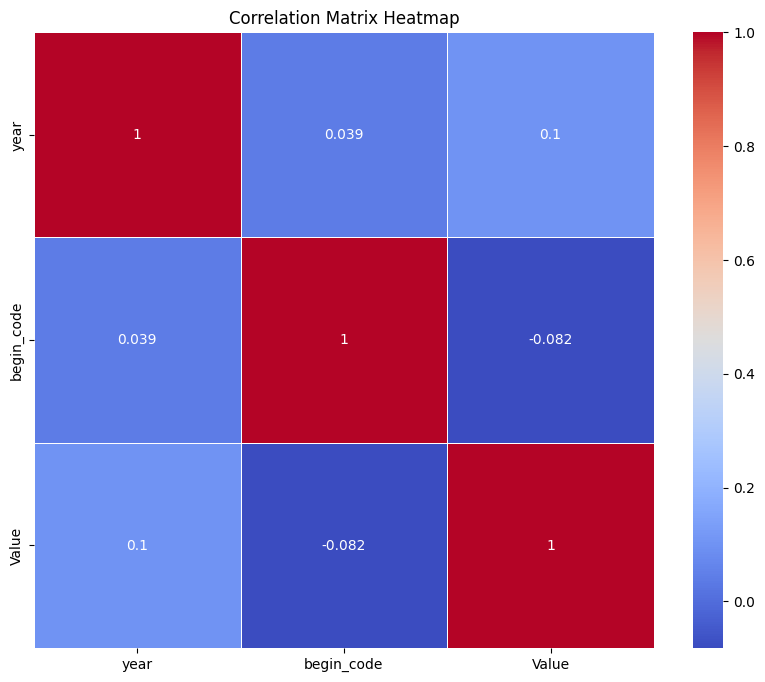

In [143]:
# Filter only numeric columns for correlation matrix
numeric_df = data.select_dtypes(include=[np.number])

# Correlation matrix and heatmap
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Scatter Plot of Year vs Value
This cell performs several operations to ensure the data is properly formatted and clean before generating a scatter plot:

1. **Check and Adjust Year Column Name:** The cell first checks if the 'year' column exists in the DataFrame. If not, it tries 'Year' as another common variant.
2. **Convert Columns to Numeric:** Both the 'year' and 'Value' columns are converted to numeric types, coercing errors to NaN. This ensures that any non-numeric values are handled appropriately.
3. **Drop Rows with NaN Values:** Rows with NaN values in either the 'year' or 'Value' columns are dropped. This ensures that the data used for the scatter plot is clean and valid.
4. **Generate Scatter Plot:** A scatter plot is created using seaborn to visualize the relationship between the 'year' and 'Value' columns. The plot is titled and labeled appropriately.

This visualization helps in identifying trends and patterns in the 'Value' data over the years.


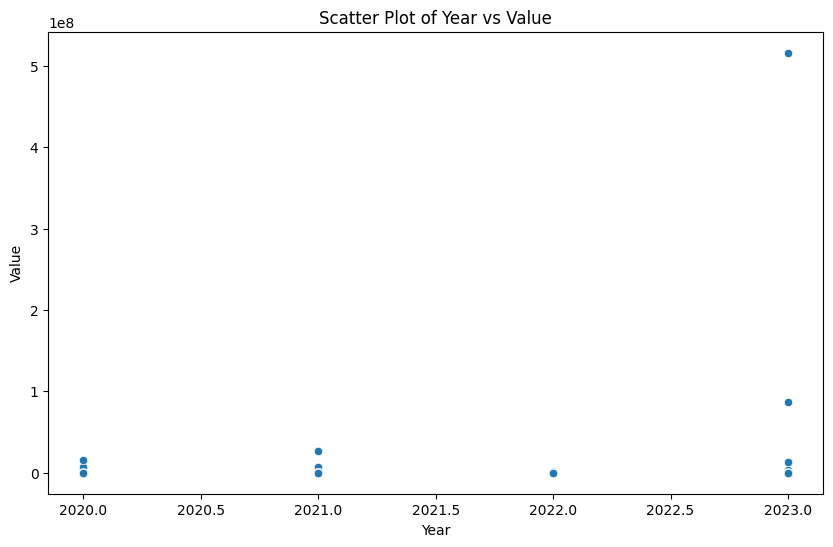

In [144]:
year_column = 'year'  # Adjust if the actual column name is different
if year_column not in data.columns:
    year_column = 'Year'  # Another common variant

data[year_column] = pd.to_numeric(data[year_column], errors='coerce')
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Drop rows with NaN values in 'year' or 'Value' after conversion
data = data.dropna(subset=[year_column, 'Value'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=year_column, y='Value')
plt.title('Scatter Plot of Year vs Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

### Histogram of 'begin_code'
This cell creates a histogram to visualize the distribution of values in the 'begin_code' column:

1. **Figure Size:** The figure size is set to 10x6 inches for better readability.
2. **Histogram with KDE:** A histogram is plotted using seaborn's `histplot` function. The number of bins is set to 30 for detailed granularity. A Kernel Density Estimate (KDE) line is included to provide a smoothed estimate of the distribution.
3. **Title and Labels:** The plot is titled 'Distribution of begin code' and the x-axis and y-axis are labeled 'Value' and 'Frequency', respectively.

This visualization helps in understanding the distribution and frequency of values in the 'begin_code' column.


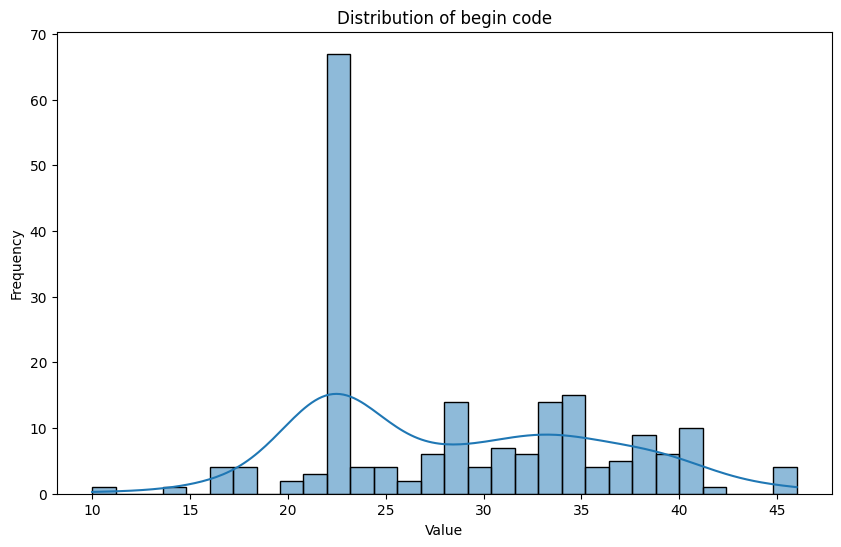

In [145]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['begin_code'], bins=30, kde=True)
plt.title('Distribution of begin code')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Histogram of 'value' distribution
This cell creates a histogram to visualize the distribution of values in the 'value' column:

1. **Figure Size:** The figure size is set to 10x6 inches for better readability.
2. **Histogram with KDE:** A histogram is plotted using seaborn's `histplot` function. The number of bins is set to 30 for detailed granularity. A Kernel Density Estimate (KDE) line is included to provide a smoothed estimate of the distribution.
3. **Title and Labels:** The plot is titled 'Distribution of Value' and the x-axis and y-axis are labeled 'Value' and 'Frequency', respectively.

This visualization helps in understanding the distribution and frequency of values in the 'Value' column.


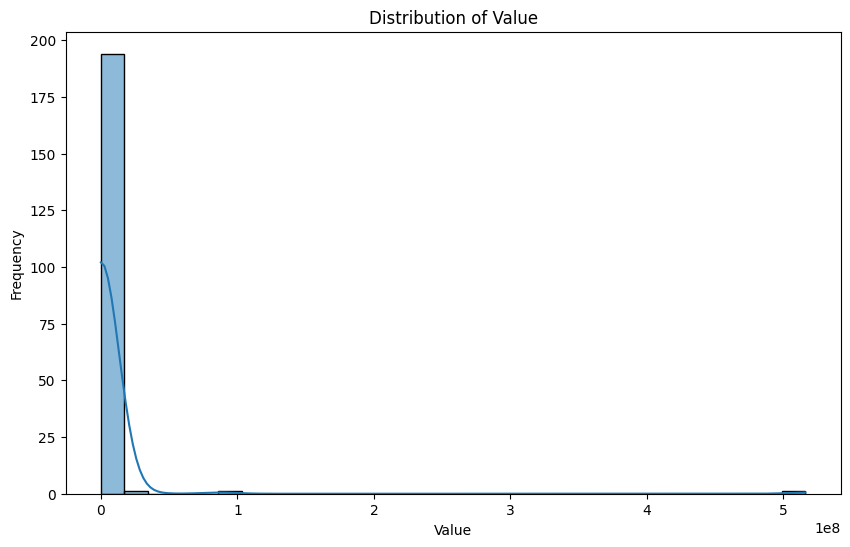

In [146]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins=30, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Cumulative Value Over Years
This cell processes the data to calculate and visualize the cumulative sum of 'Value' over the years:

1. **Check and Adjust Year Column Name:** The cell first checks if the 'year' column exists in the DataFrame. If not, it tries 'Year' as another common variant.
2. **Convert Columns to Numeric:** Both the 'year' and 'Value' columns are converted to numeric types, coercing errors to NaN. This ensures that any non-numeric values are handled appropriately.
3. **Drop Rows with NaN Values:** Rows with NaN values in either the 'year' or 'Value' columns are dropped. This ensures that the data used for the cumulative sum is clean and valid.
4. **Calculate Cumulative Sum:** The data is sorted by the 'year' column, and a new column 'Cumulative_Value' is created to store the cumulative sum of the 'Value' column.
5. **Create Cumulative Curve:** A cumulative curve is created using Plotly's `px.line` function, plotting 'year' against 'Cumulative_Value'. The plot is titled 'Cumulative Value Over Years'.
6. **Hover Information:** Hover information is added to the plot to display the year and cumulative value when hovering over the points.

This visualization helps in understanding the trend of cumulative values over the years.


In [147]:
# Ensure 'year' and 'Value' columns are numeric
year_column = 'year'  # Adjust if the actual column name is different
if year_column not in data.columns:
    year_column = 'Year'  # Another common variant

data[year_column] = pd.to_numeric(data[year_column], errors='coerce')
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Drop rows with NaN values in 'year' or 'Value' after conversion
data = data.dropna(subset=[year_column, 'Value'])

# Calculate cumulative sum of values per year
data = data.sort_values(by=year_column)
data['Cumulative_Value'] = data['Value'].cumsum()

# Create a cumulative curve using plotly
fig = px.line(data, x=year_column, y='Cumulative_Value', title='Cumulative Value Over Years')

# Add hover information
fig.update_traces(mode='lines+markers', hovertemplate='Year: %{x}<br>Cumulative Value: %{y}<extra></extra>')

# Show the plot
fig.show()

```python
# Create a box plot for the 'Value' column using Plotly
import plotly.express as px

fig = px.box(data, y='Value', title='Box Plot of Values', points="all")

# Add hover information
fig.update_traces(hovertemplate='Value: %{y}<extra></extra>')

# Show the plot
fig.show()


In [148]:
# Create a box plot for the 'Value' column using Plotly
fig = px.box(data, y='Value', title='Box Plot of Values', points="all")

# Add hover information
fig.update_traces(hovertemplate='Value: %{y}<extra></extra>')

# Show the plot
fig.show()


